In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Bar Chart and Histogram

* Build a histogram of lodging revenue with Seaborn. Filter your data to rows where LodgingRevenue is less than 1500. 
* Then, build a horizontal bar chart plotting the average room nights stayed for our top 5 countries by revenue ("DEU", "FRA", "PRT", "GBR", "ESP"). Change the color palette.

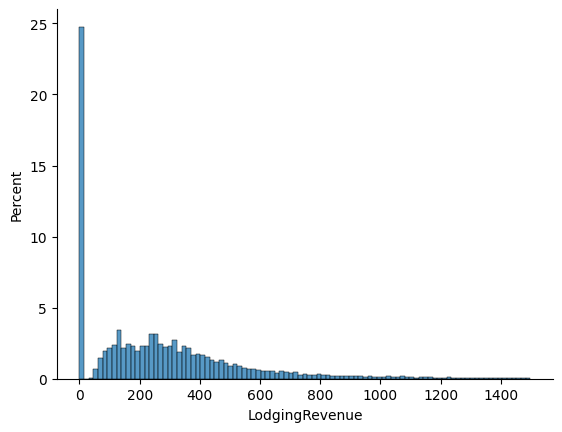

In [3]:
sns.histplot(
    data=hotels.query("LodgingRevenue < 1500"),
    x="LodgingRevenue",
    stat="percent"
)

sns.despine()

In [4]:
top5_countries_agg = (hotels
                  .groupby("Nationality")
                  .agg({"LodgingRevenue": "sum", "RoomNights": "mean"})
                  .sort_values("LodgingRevenue", ascending=False)
                  .iloc[:5]
)

In [5]:
top5 = ["GBR", "PRT", "FRA", "DEU", "ESP"]

top5_countries = hotels.query("Nationality in @top5")

In [6]:
top5_countries.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


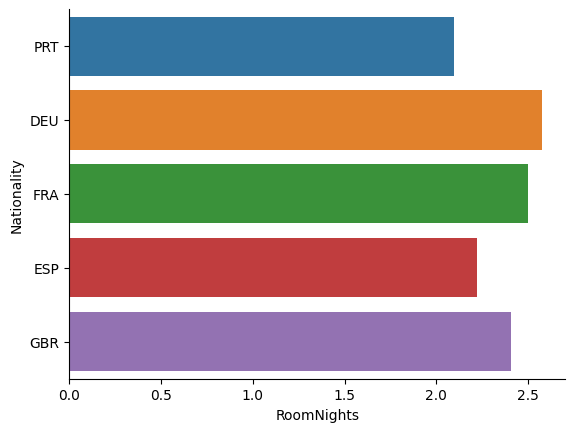

In [7]:
sns.barplot(
    data=top5_countries,
    x="RoomNights",
    y="Nationality",
    hue="Nationality",
    errorbar=None,
    # palette="husl",
    # legend=False
)

sns.despine()

# Assignment 2: Box and Violin Plots

* Build a single boxplot of LodgingRevenue for our top 5 countries, where nightly revenue is less than 1500.
* Then, build a chart that has one violinplot for each country. Look at these plots both without a filter and with lodging revenue filtered to less than 1500.
* Finally, build a violinplot for the Age distribution for each of our top 5 countries.

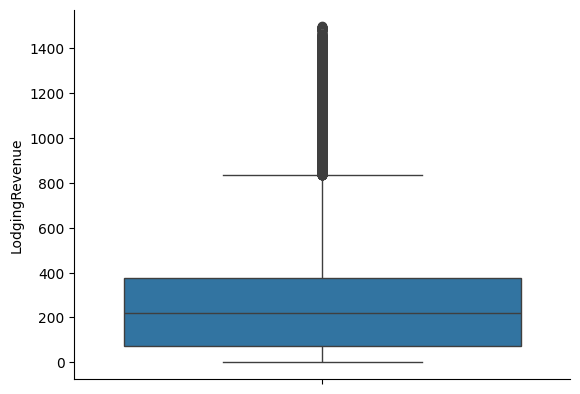

In [8]:
sns.boxplot(
    data=top5_countries.query("LodgingRevenue < 1500"),
    y="LodgingRevenue"
)

sns.despine()

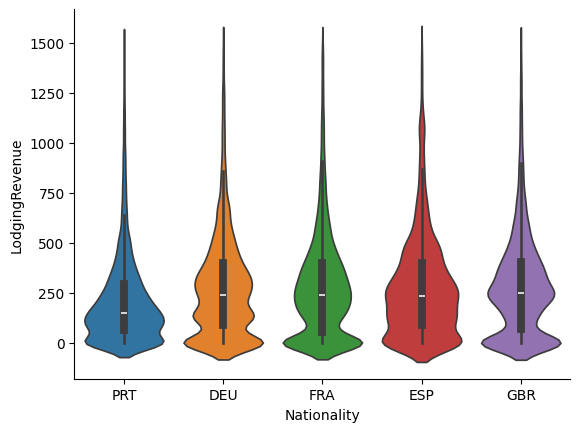

In [9]:
sns.violinplot(
    data=top5_countries.query("LodgingRevenue < 1500"),
    y="LodgingRevenue",
    x="Nationality",
    hue="Nationality",
    palette="tab10",
    legend=False
)

sns.despine()

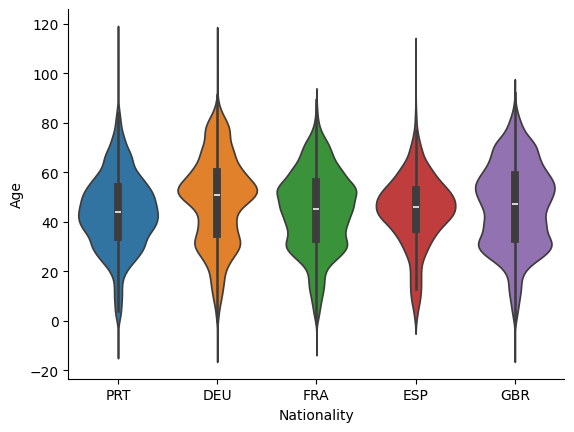

In [10]:
sns.violinplot(
    data=top5_countries,
    y="Age",
    x="Nationality",
    hue="Nationality",
    palette="tab10",
    legend=False
)

sns.despine()

# Assigment 3: Linear Relationship Plots

* Build a plot with a regression line comparing LodgingRevenue as y and RoomNights as x for rows in our top 5 countries.
* Then, build the same chart in bullet 1 but with a separate line for each of our top 5 countries. Which country appears to pay the most per night?
* Finally, build a pairplot with the columns: Age, LodgingRevenue, OtherRevenue, PersonsNights, RoomNights, and DaysSinceLastStay

<Axes: xlabel='RoomNights', ylabel='LodgingRevenue'>

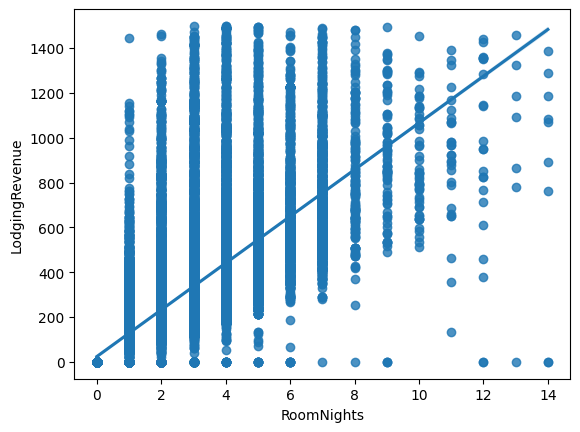

In [11]:
sns.regplot(
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15"),
    x="RoomNights",
    y="LodgingRevenue"
)

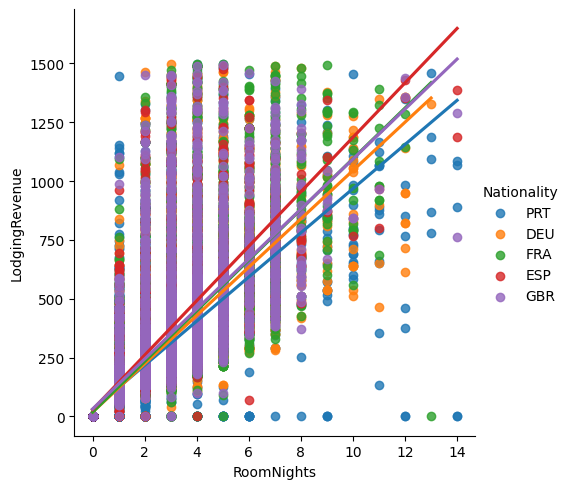

In [12]:
sns.lmplot(
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15"),
    x="RoomNights",
    y="LodgingRevenue",
    hue="Nationality",
    ci=None
)

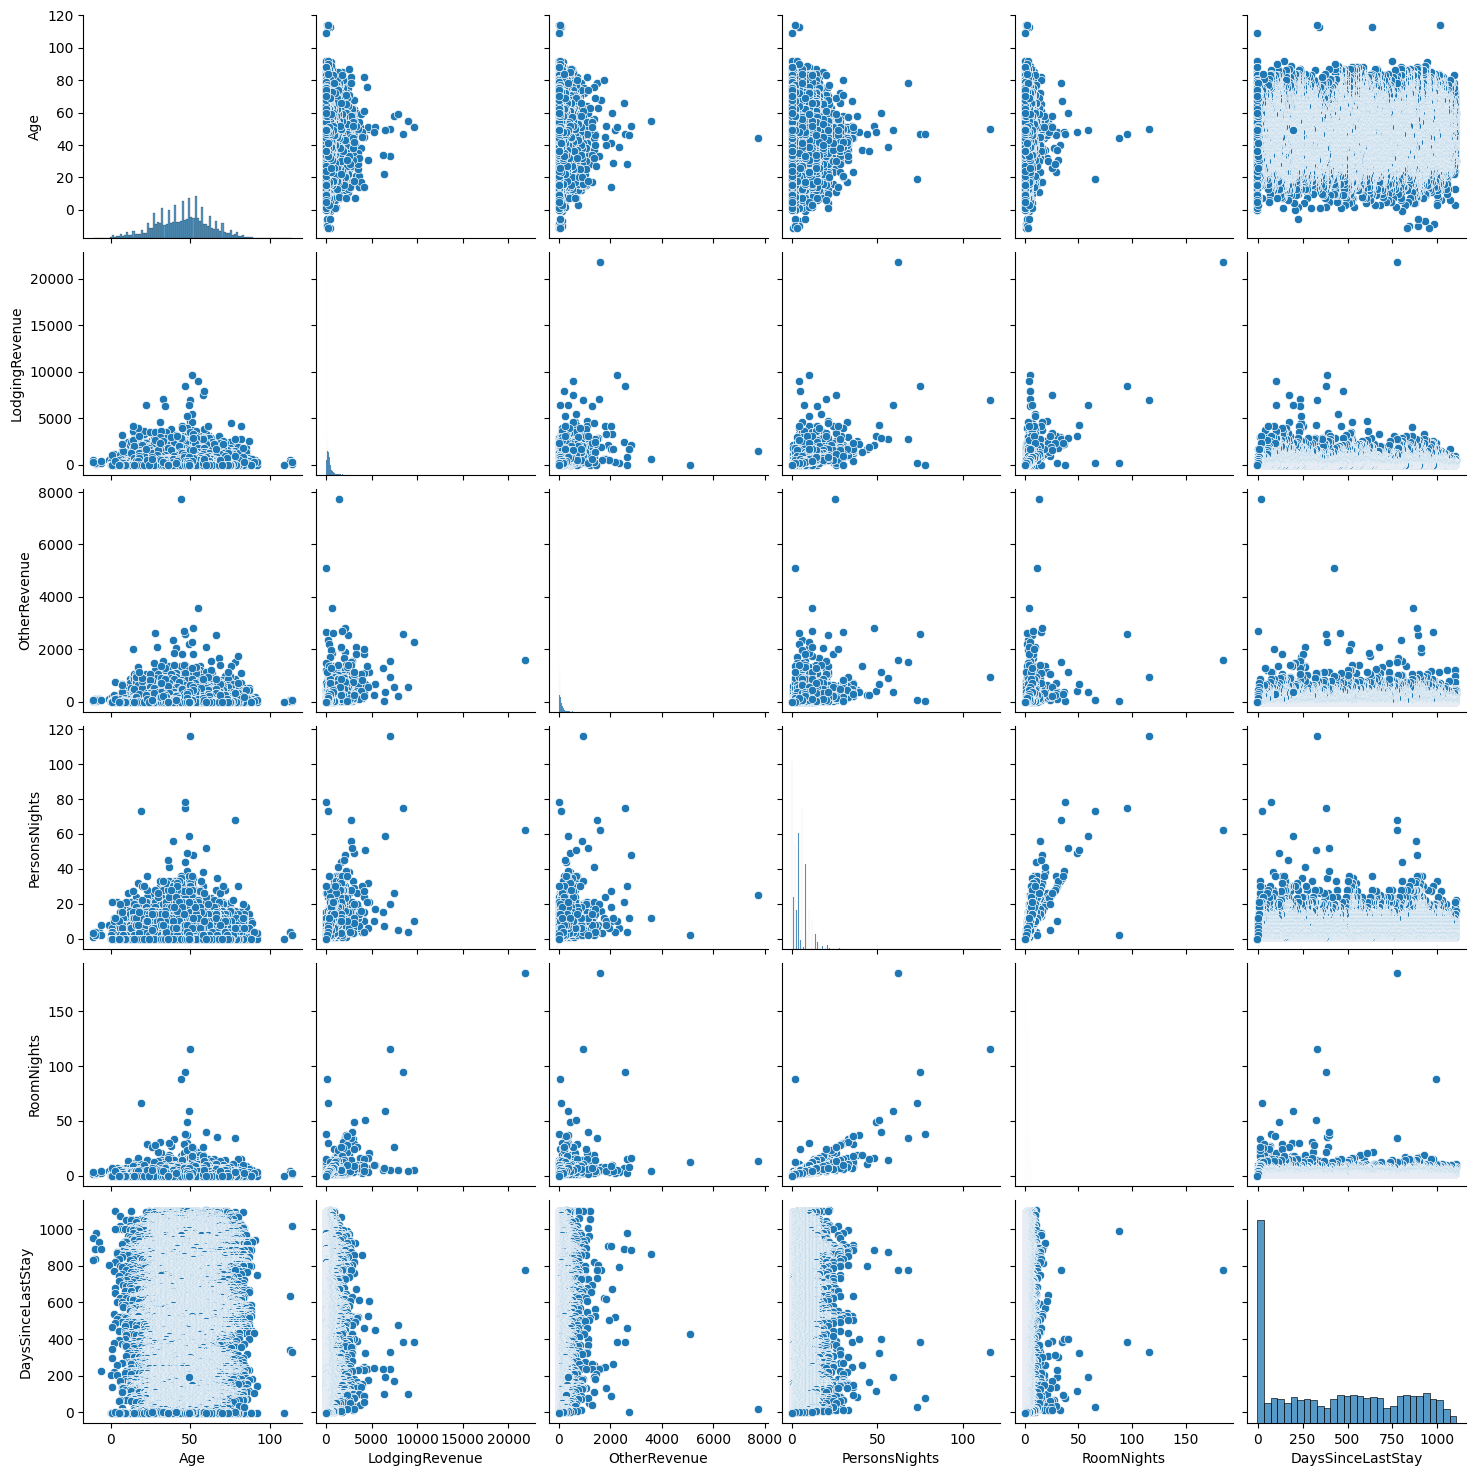

In [13]:
sns.pairplot(
    data=top5_countries.loc[:, ["Age",
                                "LodgingRevenue",
                                "OtherRevenue",
                                "PersonsNights",
                                "RoomNights",
                                "DaysSinceLastStay"]]
)

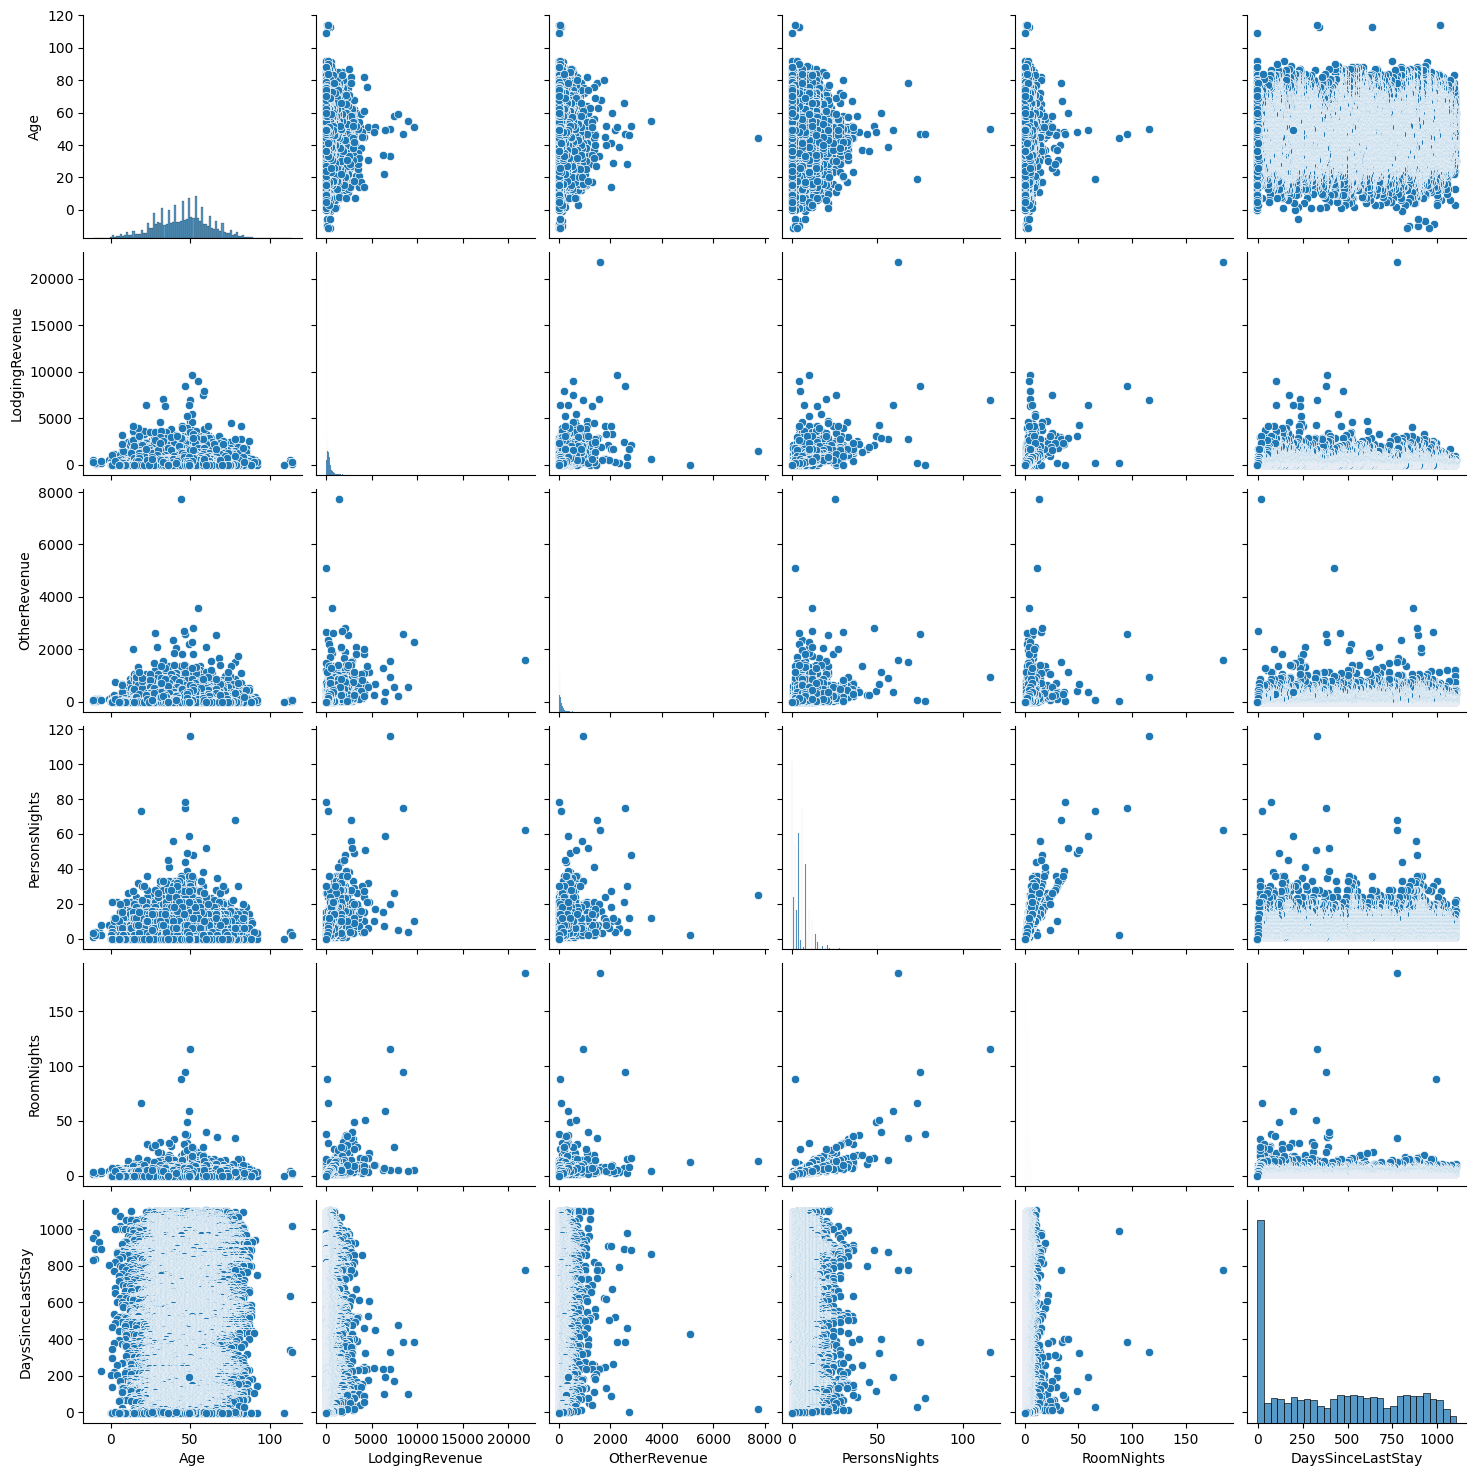

In [14]:
sns.pairplot(data=top5_countries.iloc[:, [2, 5, 6, 10, 11, 12]])

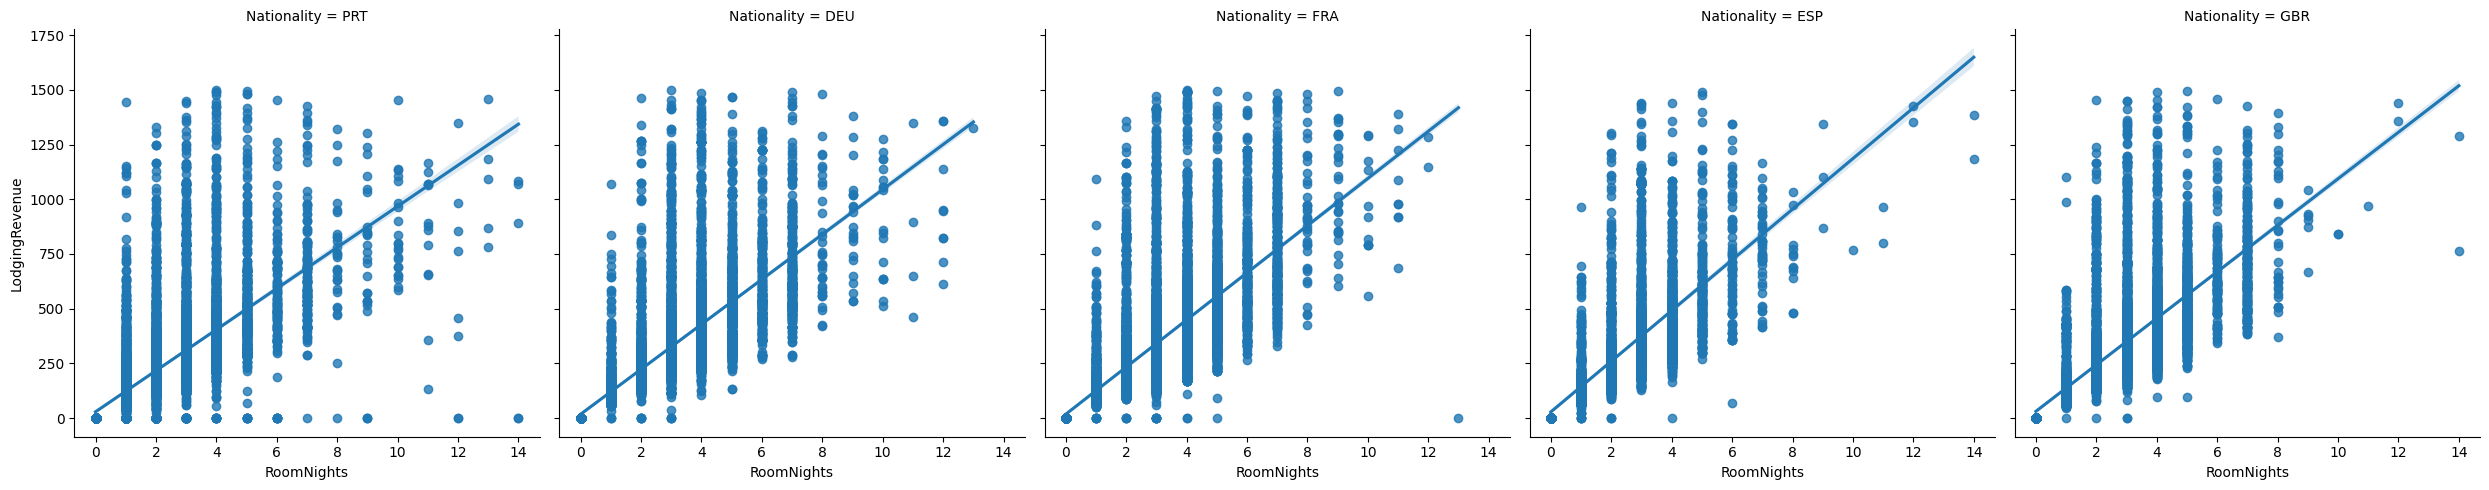

In [15]:
sns.lmplot(
    x="RoomNights",
    y="LodgingRevenue",
    col="Nationality", # Splits up plot into 5 charts
    data=top5_countries.query("LodgingRevenue < 1500 and RoomNights < 15")
)

# Assignment 4 Heatmaps


* Using the top 5 countries DataFrame, Build a heatmap of Nationality as rows and MarketSegment as columns with the mean value of LodgingRevenue in each cell.

* Then, build a heatmap of the correlation matrix created when using the .corr() method on the hotels dataframe. Use the 'vlag' color palette.

In [17]:
top5_countries_pivot = top5_countries.pivot_table(
    index="Nationality",
    columns="MarketSegment",
    values={"LodgingRevenue": "mean"}
)

<Axes: xlabel='MarketSegment', ylabel='Nationality'>

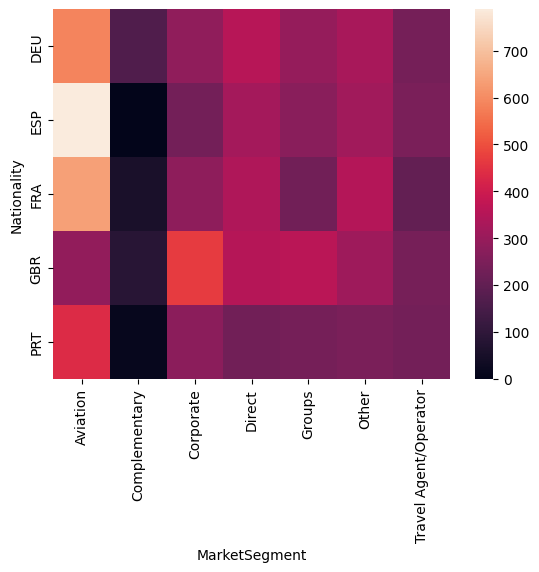

In [20]:
sns.heatmap(
    top5_countries_pivot.droplevel(0, axis=1)
)

In [22]:
top5_countries.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
top5_countries.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

<Axes: >

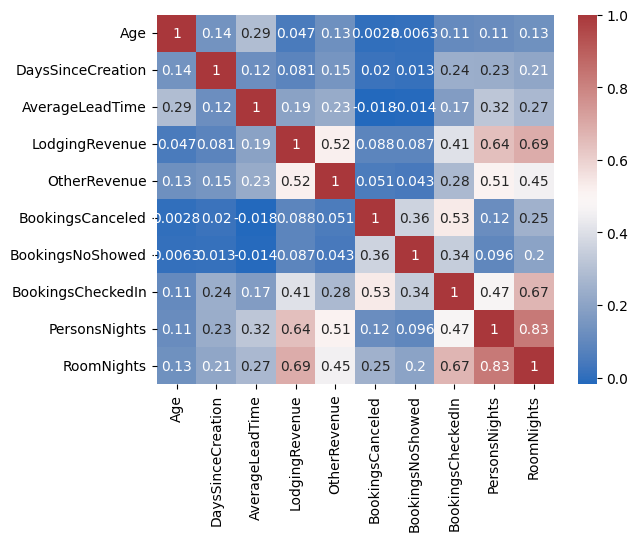

In [28]:
sns.heatmap(
    data=top5_countries.loc[:,["Age", "DaysSinceCreation", 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights']].corr(),
    annot=True,
    cmap="vlag"
)